# Introduction:

For everyone who is starting out with machine learning and even for people who are experienced with application of machine learning, statistics is one of the key tools that they have to use and understand before diving deep into the machine learning algorithms. I often say that the machine learning is just a glorified form of statistics.

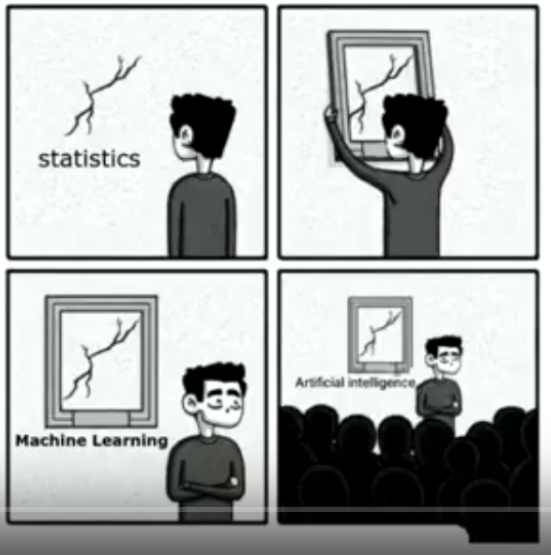

### This is a series of notebooks which will go through the techniques that is essential for the statistics and will be useful for all machine learning practitioners. It is a series of 6 notebooks:

1. [Sampling and sample distribution](https://www.kaggle.com/gireeshs/learn-statistics-1-sampling-sample-distribution)
2. [This notebook] [Confidence intervals](https://www.kaggle.com/gireeshs/learn-statistics-2-confidence-interval)
3. [WIP] Hypothesis testing
4. [WIP] Comparison of two populations
5. [WIP] Analysis of variance (ANOVA)
6. [Linear regression basics with matrix multiplication](https://www.kaggle.com/gireeshs/diy-from-scratch-linearregression-only-using-numpy)

## Motivation:
* I developed this notebook reading the book "[Complete business statistics](https://www.amazon.in/Complete-Business-Statistics-Amir-Aczel/dp/0071077901)" . 
* I also like the [youtube videos](https://www.youtube.com/c/BrandonFoltz) by Brandon Foltz, which I often recommend to someone who starts to learn data science.

# Concepts in this notebook:

- Estimating confidence interval when population standard deviation is known (z-distribution)
- Estimating confidence interval when population standard deviation is NOT known (student's t-distribution)
- Sample size estimation required for the confidence interval

# Question 1:

## The sales manager of a used car company wants to know what is the average selling price of all the used mercedes cars. 

## The analyst can collect only a sample of sales of 500 cars in the area. Since this estimate is going to be used by the company to strategize sales of his company, the sample mean should be a good approximation of all the account.

## What level of confidence is the sales manager going to be satisfied with? What +/- interval number is going to be acceptable?

### Assumption: Population standard deviation is know and it is assumed to be σ = 11,850

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv")
np.std(data["price"])

## Confidence intervals when population standard deviation is known:

- When we estimate a population parameter using a sample, it is never going to be perfect. There is always an error that is built in. 
- We can express that error using an interval estimate: 
### Point estimate (like sample mean) ± Margin of error

#### Recall in our [previous notebook](https://www.kaggle.com/gireeshs/learn-statistics-sampling-and-sample-distribution)  we discussed in detailed about the standard error of the mean. To compute the standard error of the mean we need two things:
- Population Standard Deviation 
- Size of the sample

### At a (1 - α) 100% confidence interval for the mean μ when σ is known is:

$$ \bar X \pm Z _{\dfrac{\alpha}{2}} \dfrac{\sigma}{\sqrt{n}}$$

### Thus for a 95% confidence interval we have:

$$ (1 - \alpha) 100% = 95 $$

$$ (1 - \alpha) = 0.95 $$

$$ \alpha = 0.05 $$

$$ \frac{\alpha}{2} = 0.025 $$

### From a normal table we can find that:

$$ Z _\dfrac{\alpha}{2} =  Z _{0.25} = 1.96 $$

### Substituting this in the first equation we get: 

$$ \bar X \pm 1.96 \dfrac{\sigma}{\sqrt{n}}$$

In [ ]:
np.random.seed(11)
sample_500 = data.sample(n = 500)["price"]
x_bar = np.mean(sample_500)
x_bar

$$ \bar X \pm 1.96 \dfrac{\sigma}{\sqrt{n}} = 24991 \pm 1.96 \dfrac{11850}{\sqrt{500}}  = [23952 , 26029] $$

## So at 95% confidence the value of the population mean falls within the range 23,952 and 26,029

<hr>

# Question 2:

## In addition to the price of the car, the manager also wants to now know the average mileage that the car has been driven. But the manager does not have the population standard deviation for the mileage. But the mileage data is available only from the 15 cars that they have sold so far.

## How do the analyst approach this problem to calculate 95% confidence interval, with only 15 samples?

## The student's T Distribution:

### When we do not know the population standard deviation, we have to estimate it. In these cases we use the t-distribution insted of the Z-distribution.

#### Key difference between Z-Distribution and T-Distribution are:
- The Z-distribution is the standard normal curve, which is the same for all the sample sizes, Whereas the t-distribution varies as per the degrees of freedom (n - 1) of the sample size. 
- Smaller the sample size, more shorter and fatter the distribution will be. There will be more tail probability.
- As the number of samples n becomes larger, then the t-distribution will converge into z-distribution.


In [ ]:
np.random.seed(11)
sample_15 = data.sample(n = 15)["mileage"]
x_bar = np.mean(sample_15)
print("x_bar is:", str(x_bar))
print("s is:", np.std(sample_15))

In [ ]:
from scipy import stats

no_of_samples = 15

print(stats.t.ppf(1-0.025, no_of_samples - 1))

### At a (1 - α) 100% confidence interval for the mean μ when σ is NOT known is:

$$ \bar X \pm t _{\dfrac{\alpha}{2}} \dfrac{s}{\sqrt{n}}$$

### For our problem:

$$ \bar X \pm t _{\dfrac{\alpha}{2}} \dfrac{s}{\sqrt{n}} = \bar X \pm 2.144 \dfrac{s}{\sqrt{n}} = 15016 \pm 2.144 \dfrac{13380}{\sqrt{15}} = [7609.12, 	22422.87] $$

<hr>

# Question 3:

## The manager is not happy with both the intervals as the interval for the confidence is very high. The manager now asks the analyst to estimate the average price of the car (similar to question 1) but within a bound of 1000 from the mean with 95% condidence level. How many sample does the analyst have to collect to arrive at this confidence interval level?

# Sample-size determination:

### Often before collecting the sample, the researcher should decide upon what is the minimum number of samples needed for the study. As we all know that the larger the sample is, it is better for the outcome of the study, but there is typically cost and time involved in collecting the samples. 

### The size of the sample is affected by parameters such as:
- Bound that we need our interval to be within. This is represented by B. In question 3, B = 1000
- The confidence level (1−𝛼). In question 3 this is 95%
- What is the estimate of variance (of standard deviation) of the population? from question 1 we assume this to be σ = 11,850

## The minimum number of required samples to estimate the population mean μ is:

$$ n = \dfrac{Z^2 _{\alpha / 2} \sigma^2}{B^2} $$

## For our question 3:

$$ n = \dfrac{Z^2 _{\alpha / 2} \sigma^2}{B^2} = \dfrac{1.96^2 11850^2}{1000^2} = 539.4 $$

Hence, the analyst would need atleast 540 samples to be able to find the sample means within 95% confidence intervals of the population mean of 1000 range

<hr>

# Question 4:

## Conversely, after the analyst started collecting the data, after a week he was only able to collect for 420 samples, though he needs 540 samples for B of 1,000, if he has to do the analysis now, what is the best interval he can acheive for 95% confidence levels?

### This is converse senario to the question 3. From the formula for the sample size determination we can come up with the formula for calculating the bounds:

$$ n = \dfrac{Z^2 _{\alpha / 2} \sigma^2}{B^2} $$

$$ B = Z _{\alpha / 2} \dfrac{\sigma}{\sqrt n} $$

### Hence for our question:

$$ B = Z _{\alpha / 2} \dfrac{\sigma}{\sqrt n} = 1.96 \dfrac{11850}{\sqrt 420} = 1133.31 $$

### The analyst will be able to construct the sample means within 1133 of the population mean with 420 samples.

### Please upvote this notebook if you found this notebook interesting. 

## Visit my other notebooks on statistics here:

1. [Sampling and sample distribution](https://www.kaggle.com/gireeshs/learn-statistics-1-sampling-sample-distribution)
2. [This notebook] [Confidence intervals](https://www.kaggle.com/gireeshs/learn-statistics-2-confidence-interval)
3. [WIP] Hypothesis testing
4. [WIP] Comparison of two populations
5. [WIP] Analysis of variance (ANOVA)
6. [Linear regression basics with matrix multiplication](https://www.kaggle.com/gireeshs/diy-from-scratch-linearregression-only-using-numpy)

# References:
1. https://youtu.be/9GtaIHFuEZU
2. https://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic
3. https://machinelearningmastery.com/what-is-statistics